In [1]:
%reload_ext autoreload 
%autoreload 2

In [2]:
# Import library 
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
from collections import namedtuple

In [3]:
from reestimator.preprocessing.exploration import Exploration_data

# TEST FONCTIONS OF THE EXPLORATION_DATA CLASS

In [4]:
# Get_data from gz
df_2020 = pd.read_csv('../../../Krys28/Project-Real estate estimator/data/csv/2020.gz', compression='gzip')
df_2020.head(10)

/home/krystelle/.pyenv/versions/lewagon/envs/reestimator/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (8,10,12,14,16,17,18,20,22,35,36) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,...,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude
0,2020-1,2020-01-07,1,Vente,8000.0,NaN,NaN,FORTUNAT,B063,1250.0,...,NaN,NaN,NaN,T,terres,NaN,NaN,1061.0,5.323540,46.171919
1,2020-2,2020-01-02,1,Vente,2175.0,NaN,NaN,TERRES DES CINQ SAULES,B124,1290.0,...,NaN,NaN,NaN,BT,taillis simples,NaN,NaN,85.0,4.893436,46.251868
2,2020-2,2020-01-02,1,Vente,2175.0,NaN,NaN,BOIS DU CHAMP RION,B006,1290.0,...,NaN,NaN,NaN,T,terres,NaN,NaN,1115.0,4.899919,46.235327
3,2020-2,2020-01-02,1,Vente,2175.0,NaN,NaN,EN COROBERT,B025,1290.0,...,NaN,NaN,NaN,T,terres,NaN,NaN,1940.0,4.882347,46.246519
4,2020-2,2020-01-02,1,Vente,2175.0,NaN,NaN,TERRES DES CINQ SAULES,B124,1290.0,...,NaN,NaN,NaN,T,terres,NaN,NaN,1148.0,4.894688,46.251820
5,2020-2,2020-01-02,1,Vente,2175.0,NaN,NaN,TERRES DES CINQ SAULES,B124,1290.0,...,NaN,NaN,NaN,T,terres,NaN,NaN,2960.0,4.894607,46.251943
6,2020-3,2020-01-07,1,Vente,75000.0,NaN,NaN,RUE DE LA CHARTREUSE,0064,1960.0,...,NaN,NaN,NaN,AB,terrains a bâtir,NaN,NaN,610.0,5.226198,46.184538
7,2020-4,2020-01-07,1,Vente,123.0,NaN,NaN,CHAMP PORTIER,B041,1370.0,...,NaN,NaN,NaN,S,sols,NaN,NaN,55.0,5.344396,46.263943
8,2020-4,2020-01-07,1,Vente,123.0,NaN,NaN,CHAMP PORTIER,B041,1370.0,...,NaN,NaN,NaN,S,sols,NaN,NaN,68.0,5.343884,46.263800
9,2020-5,2020-01-09,1,Vente,72000.0,NaN,NaN,CHAMPEL,B034,1270.0,...,NaN,NaN,NaN,J,jardins,NaN,NaN,328.0,5.350565,46.380898


In [5]:
explorer = Exploration_data(df_2020)

In [6]:
list_floats = list(df_2020.select_dtypes(include=['int']).columns)
list_floats

['numero_disposition', 'nombre_lots']

In [7]:
explorer.get_float_columns()

['valeur_fonciere',
 'adresse_numero',
 'code_postal',
 'ancien_code_commune',
 'lot1_surface_carrez',
 'lot2_surface_carrez',
 'lot3_surface_carrez',
 'lot4_numero',
 'lot4_surface_carrez',
 'lot5_numero',
 'lot5_surface_carrez',
 'code_type_local',
 'surface_reelle_bati',
 'nombre_pieces_principales',
 'surface_terrain',
 'longitude',
 'latitude']

In [8]:
explorer.get_count_of_missing_values()

,0
ancien_nom_commune,2459559
ancien_id_parcelle,2459559
ancien_code_commune,2459559
lot5_surface_carrez,2458997
lot4_surface_carrez,2458303
lot5_numero,2455417
lot3_surface_carrez,2454703
numero_volume,2452794
lot4_numero,2450649
lot3_numero,2434251


In [9]:
explorer.get_columns_without_missing_values()

,0
nombre_lots,0
date_mutation,0
id_parcelle,0
code_departement,0
nom_commune,0
code_commune,0
nature_mutation,0
numero_disposition,0
id_mutation,0


In [10]:
explorer.get_count_missing_vals_in_1column(col_name='date_mutation')

2459560

In [11]:
df_2020.columns

Index(['id_mutation', 'date_mutation', 'numero_disposition', 'nature_mutation',
       'valeur_fonciere', 'adresse_numero', 'adresse_suffixe',
       'adresse_nom_voie', 'adresse_code_voie', 'code_postal', 'code_commune',
       'nom_commune', 'code_departement', 'ancien_code_commune',
       'ancien_nom_commune', 'id_parcelle', 'ancien_id_parcelle',
       'numero_volume', 'lot1_numero', 'lot1_surface_carrez', 'lot2_numero',
       'lot2_surface_carrez', 'lot3_numero', 'lot3_surface_carrez',
       'lot4_numero', 'lot4_surface_carrez', 'lot5_numero',
       'lot5_surface_carrez', 'nombre_lots', 'code_type_local', 'type_local',
       'surface_reelle_bati', 'nombre_pieces_principales',
       'code_nature_culture', 'nature_culture', 'code_nature_culture_speciale',
       'nature_culture_speciale', 'surface_terrain', 'longitude', 'latitude'],
      dtype='object')

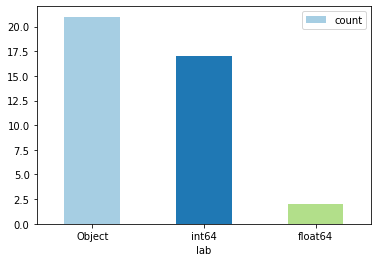

In [12]:
explorer.visualize_feature_types()

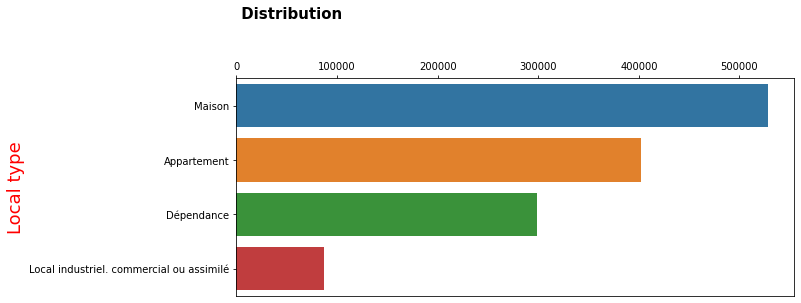

In [13]:
explorer.visualize_type_local()

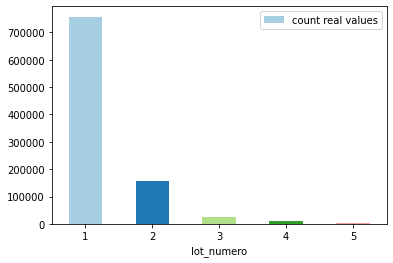

In [14]:
explorer.visualize_lot_numero_columns()

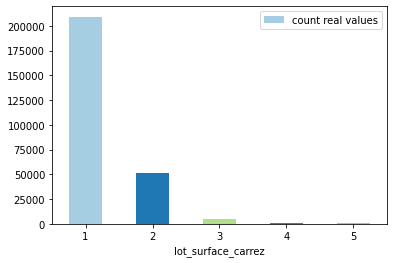

In [15]:
explorer.visualize_lot_surface_columns()